# Cian Hogan
## Machine Learning and Statistics Module
## GMIT Data Analytics
### Final Assessment

<img src="https://docs.scipy.org/doc/scipy/_static/scipyshiny_small.png" alt="Scikit-Learn Logo" align="left" border=0/>  


# SciPy.stats

# Introduction

SciPy is a third-party python library for scientific computing. It is based on the numpy package and provides a collection of mathematical algorithms and convenience functions for advanced statistical analysis. The package provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and more.(scipy.org, 2021)

Below are a list of all available modules within the SciPy ecosystem:
- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fft)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse eigenvalue problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)

This project will focus on the statistics package, **scipy.stats**, contained within the scipy library and examine how the package can be used to conduct hypothesis testing in the form of ANOVA.
***

# SciPy Stats

The scipy.stats module contains a vast array of array of statistical functions that provide access to probability distributions, summary and frequency statistics, kernel density estimates, correlation functions and statistical tests and  more.

The python package Numpy, for numerical computing, offers a number of statistical functions for quick calculations, such as mean, median, standard deviation ect. The scipy stats module expands on this functionality allowing the use of more advanced statistical functions, probability distributions and other statistical methods.(Bressert, E, 2013)


The scipy.stats provides functions for over 100 probability distributions, dozens of statistical functions and statistical tests. Each of these could be examined in great detail. For the purposes of this report, we will look specifically at performing an ANOVA analysis using the methods provided within scipy.stats.
***

# Anova

ANOVA (Analysis of variance) is a statistical technique for examining the differences between the means of two or more populations. In general Anova is reserved for 3 or more populations as a t-test can be performed for 2 groups.

Typically the null hypothesis assumes that all group means are equal, and the alternative hypothesis is that the means are significantly different. For the null hypothesis to be rejected, the ANOVA must shows that there is sufficient evidence to support that the means are not the same.

An ANOVA must have a continuous (metric) dependent variable, and two or more categorical (non-metric) independent variables. For example, house prices could be our dependent variable, a house has a distinct price in euros, and our independent variables could be province of purchase (Munster, Leinster, Connacht, Ulster). The indedepent variable is also called the factor. 

The simplest form of ANOVA is a one-way ANOVA where there is only one categorical variable to consider. If more than one factors are used, it requires an n-way ANOVA analysis. For the purposes of our analysis we will only consider a One-way ANOVA. (Malhorta,N & Birks,D, 2006)
***

# One-Way ANOVA
One-way ANOVA examines the difference of the mean values of a dependent variable, for several categories of a single independent variable.

The null hypothesis is that the means for each group (different independent variable) are the same. If the null hypothesis is not rejected then the independent variable can be said to not have significant effect on the dependent (metric) variable.

If the null hypothesis is rejected and the alternative accepted, then the independent variable does have a significant effect on the dependent variable. To analyse whether we can reject the null hypothesis we use ANOVA to calculate the F-statistic and P value of the data, and if the F-statistic exceeds the critical value based of the F-distribution, we can reject the null hypothesis that the means are the same. (Malhorta,N & Birks,D, 2006)
***

'Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html\n'

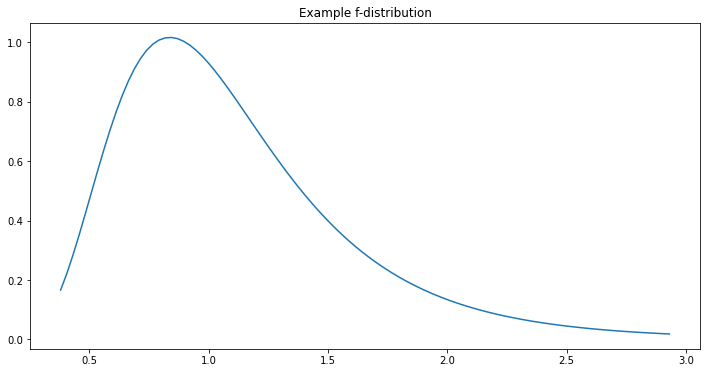

In [1]:
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 6]

dfn, dfd = 29, 18
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)

plt.plot(x, f.pdf(x, dfn, dfd), label='f pdf')
plt.title("Example f-distribution")
"""Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html
"""

## Assumptions

Before we complete our AVONA analysis, we must first make sure our data meets the criteria to be used with ANOVA. To do this this we must make sure the data meets the below assumptions.

1. The dependent variable must be continuous, ie it should be a metric value.

2. The independent variable must consist of 3 or more categorical values. In general ANOVA is reserved for 3 or more groups or categories.

3. There should be independence of observations, meaning that there should be no cross-over between the groups. This is most applicable in the study design stage but important to remember when assessing if ANOVA is an appropriate statistical test.

4. There should be no significant outliers, outliers can have a large negative effect on the performance of the ANOVA analysis. 

5. The dependent variable for each category should follow an approximate normal distribution. It is possible to test for normality using the the Shapiro-Wilk test of normality.

6. There should be homogeneity of variances between the category samples. This means that the samples should show a similar spread of values from the means. (statistics.laerd.com, 2018)


## F statistic

The F-Statistic is a ratio of the Between-category variation and the Within-category variation, listed below as SSx and SSerror respectively.

SSx or Between-category variation is calculated as, the sum of each of the category means minus the overall mean of the total sample squared, multiplied by the number of samples in the category, written as:

$SSx =\sum_{}$n(category mean - sample mean)$^2$

SSerror or within-category variation is calculated as, the sum of each value, minus it's own category mean and squared, written as:

$SSerror =\sum_{}$(each individual value - category mean)$^2$

To calculate the F statistic we take our SSx and SSerror and perform a finals calculation to determine the F-ratio or F statistic. Calculating the F statistic requires the use of 2 more variables, the degrees of freedom numerator (dfn) and the degrees of freedom denominator (dfd). The dfn is defined as the number of categories minus 1. the dfd is defined as the number of samples minus the number of categories. In our example below we have 3 categories and 30 total samples so our dfn is 2 and our dfd is 27.

The F statistic is equal to SSx divided by the dfn over the SSerror divided by the dfd, written as:

$ SSx | dfn \over SSerror | dfd $

(Malhorta,N & Birks,D, 2006)
***

## Manual ANOVA

Now that we have shown above how the ANOVA can be completed, we can use python to manually calculate our F statistic.

To start we import a number of packages which will be used throughout the report. Using Numpy's random module we can create 3 random groups of data, a, b and c. Each group has 10 values, ranging between 0 and 10. For easier calculations we also create a list of our entire sample, called totalSample and calculate the mean of the sample, **4.13**.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=49)

a = rng.integers(low=0, high=10, size=10)
b = rng.integers(low=0, high=10, size=10)
c = rng.integers(low=0, high=10, size=10)

totalSample = []

for i in [a,b,c]:
    for j in i:
        totalSample.append(j)
        
sampleMean = sum(totalSample)/len(totalSample)
sampleMean

4.133333333333334

Next we can calculate the value for SSx. Here we loop through each category and calculate the mean of each category, take the overall sample mean away, square our result and multiple by the number of samples in the given category. This gives us a total SSx of **6.066**.

In [3]:
SSx = 0

for i in [a,b,c]:
    catMean = (sum(i)/len(i))
    SSx += len(i)*((catMean-sampleMean)**2)
    
SSx

6.066666666666668

Now that we have our SSx value, we need our SSerror to be able to find our F statistic. To calculate SSerror, we loop through a list of categories and use a second loop to loop through each value within those categories. We take the category mean from the value and square the result adding the squared result to our sum variable SSerror. Our total for SSerror is **269.4**

In [4]:
SSerror = 0

for i in [a,b,c]:
    for j in i:
        catMean = (sum(i)/len(i))
        SSerror += (j-catMean)**2
        
SSerror

269.4

We can check our work by finding the total variation within the sample. The total variation is denoted as SSy and should be equal to SSx + SSerror. SSy is calculated as the Sum of the square of each value in the sample minus the total sample mean. In our case the result is **275.47** which is the same as SSx + SSerror.

$ SSy = SSx + SSerror $

In [5]:
SSy = 0
for i in totalSample:
    SSy += (i-sampleMean)**2
    
print(f"Total Variation: {round(SSy,2)}, Between Category + Within Category Variation {round(SSerror+SSx,2)}")

Total Variation: 275.47, Between Category + Within Category Variation 275.47


Now that we have calculated our SSx and SSerror, and verified our results are equal to SSy, we can calculate our F statistic.

First we set our dfn and dfd variables for our degrees of freedom. Then we calculate our F statistic as: $ SSx | dfn \over SSerror | dfd $ which equates to **0.3040** 

In [6]:
dfn, dfd = (3-1), ((len(totalSample)-3)) 

F_stat = (SSx/dfn)/(SSerror/dfd)

print(f"F statistic for the groups a,b,c: {round(F_stat,4)}")

F statistic for the groups a,b,c: 0.304


### F Statistic using scipy.stats

The scipy.stats module provides a convenient function call f_oneway that completes all the above calculations for us and returns an F statistic and p value for our samples. With a single line of code, shown below we can work out the same F statistic from above as **0.30400**. (scipy.org, 2021)

In [7]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.30400890868596886, pvalue=0.7403468919825463)

***
## Accept or Reject the null hypothesis

As noted earlier we can reject the null hypothesis, only if the F statistic is larger than the critical value, from the F distribution based on the degrees or freedom and significance level chosen. The below chart shows an F distribution chart for a significance of **.05**. 

We can find the critical value by referencing down from the degrees fo freedom for the numerator (2) and across from the degrees of freedom for the denominator (27). From the chart below we see that the critical value is **3.35**.

For us to reject the null hypothesis the F statistic must be over 3.35 for our confidence level .05. In our case above the F statistic is much lower than this so we can accept the null hypothesis that the means of the 3 categories are the same.
<br>

![](https://www.statology.org/wp-content/uploads/2018/09/f.05.png)

***
# Real World Data and Anova

Now that we have looked at the theory behind the ANOVA test we can perform an ANOVA analysis on data from real world observations. Below we import the Iris dataset from Scikit-learn. The Iris dataset, popularised by statistician [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), lists 150 iris flowers and their sepal and petal lengths and widths. It also includes a label for each entry that states the species of the flower, Setosa, Virginica or Versicolor.

We load the data using the sklearn load_iris method and store the data in a pandas dataframe for easy manipulation. We add the species information to the dataframe and create 3 smaller dataframe copies, one for each species type.

We show some descriptive statistics for the different species using the pandas describe() method, and plot the data using Seaborn's pairplot function to illustrate the different features of the data.


In [8]:
from sklearn.datasets import load_iris
import seaborn as sns

data = load_iris()

df = pd.DataFrame(data.data, columns= data.feature_names)
df["species"] = data.target_names[data.target]

df_setosa = df[df['species']=="setosa"]
df_versicolor = df[df['species']=="versicolor"]
df_virginica = df[df['species']=="virginica"]

print(f"Setosa:\n{df_setosa.describe()}\n")
print(f"Virginica:\n{df_versicolor.describe()}\n")
print(f"Versicolor:\n{df_virginica.describe()}")    

Setosa:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  

Virginica:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.936000      

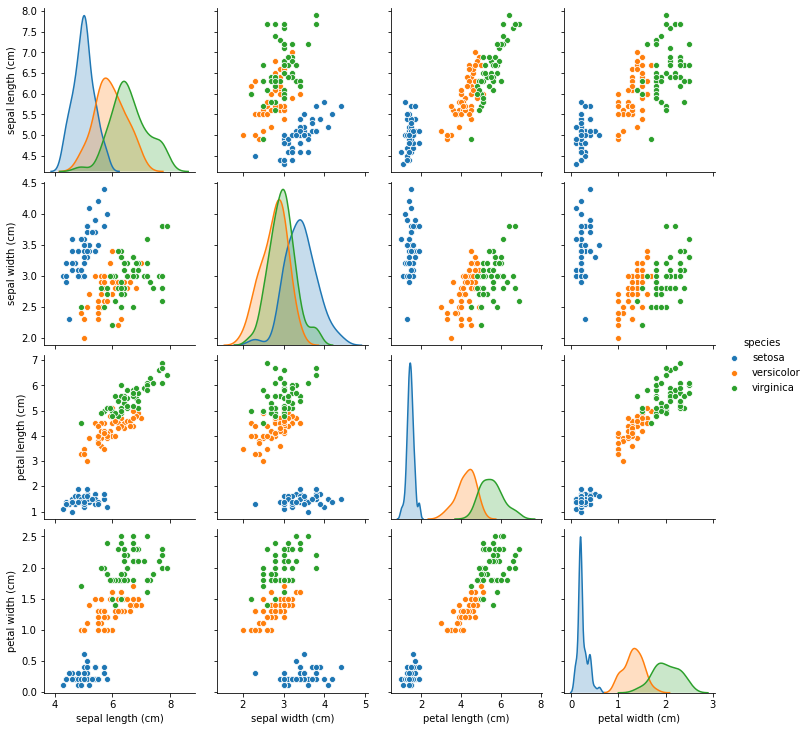

In [9]:
sns.pairplot(df, hue="species")

## Hypothesis and Assumptions

### Null Hypothesis
When performing a one-way ANOVA we need a single variable or factor to test. For our purposes we will look at flower sepal width, but it could be any of the above features.

Our Null hypothesis therefor is that the mean sepal width for each species of flower is the same.

### Assumptions
Now that we have our Null hypothesis to test, we must ensure that our data does not violate the 6 assumptions presented earlier.

#### Assumption 1
The first assumption is that our dependant variable is a continuous value. Our dependent variable in our case is flower sepal width. This is a continuous value of measurements in centimetres, ranging from 2cm-4.4cm. This meets the conditions of assumption 1.

#### Assumption 2
The second assumption is that our independent variable (species) consists of two or more (ideally 3 or more) categories. In our case we have 3 distinct species, Setosa, Virginica and Versicolor. This meets assumption 2.

#### Assumption 3
The third assumption is that we need to have independence of observations, meaning that the samples in each group are independent of each other, and that samples do not appear across multiple groups. As each sample is of a distinctly different flowers we can be sure that our data meets the assumption 3 criteria.

#### Assumption 4
Assumption 4 states we should have no significant outliers. Below we create a function to check our data for any significant outliers. For a normally distributed sample we would expect to see 95% of values fall within 2 Standard deviations of the mean and 99% of values to fall within 3 standard deviations of the mean. We write the below function to accept a data series and number of standard deviations (numStnDev) as parameters. The numStnDev is used to set the function's high and low thresholds.

The function loops through the data and returns the count of how many items are outside our thresholds as well as a list of indexes of those items. We can now use that function to check how many data points might be considered outliers.

A few items are outside of 2 standard deviations of the mean, as shown in fig A below. The overall sample shows more items than the individual species samples. When we extend the function out to 3 standard deviations we see only a single value returned for the overall sample and none returned within the individual species samples.

The single value returned, index no.15, is a setosa species sample who's sepal length is just over 3 times the standard deviation of the overall sample, 3.0805. 

At this stage we have identified a potential outlier, and must decide whether we plan to remove them from the sample before continuing with the ANOVA analysis. We will not remove any data from this sample, however we can note that this may potentially have an effect of the results of the ANOVA later.


In [10]:
def checkForOutliers(dataSeries, numStnDev):
    lowerLimit = dataSeries.mean() - (dataSeries.std()*numStnDev)
    upperLimit = dataSeries.mean() + (dataSeries.std()*numStnDev)

    count = 0
    items = []

    for i, v in enumerate(dataSeries):
        if v < lowerLimit or v > upperLimit:
            count += 1
            items.append(i)

    return (count, items)


In [11]:
print("Fig A.")
print("Check for values > 2 std deviations from mean")
print("-"*50)
print(f"Overall sample outliers: {checkForOutliers(df['sepal width (cm)'],2)}")
print(f"Setosa sample outliers: {checkForOutliers(df_setosa['sepal width (cm)'],2)}")
print(f"Versicolor sample outliers: {checkForOutliers(df_versicolor['sepal width (cm)'],2)}")
print(f"Virginica sample outliers: {checkForOutliers(df_virginica['sepal width (cm)'],2)}")

Fig A.
Check for values > 2 std deviations from mean
--------------------------------------------------
Overall sample outliers: (5, [14, 15, 32, 33, 60])
Setosa sample outliers: (3, [15, 33, 41])
Versicolor sample outliers: (2, [10, 35])
Virginica sample outliers: (3, [17, 19, 31])


In [12]:
print("Fig B.")
print("Check for values > 3 std deviations from mean")
print("-"*50)
print(f"Overall sample outliers: {checkForOutliers(df['sepal width (cm)'],3)}")
print(f"Setosa sample outliers: {checkForOutliers(df_setosa['sepal width (cm)'],3)}")
print(f"Versicolor sample outliers: {checkForOutliers(df_versicolor['sepal width (cm)'],3)}")
print(f"Virginica sample outliers: {checkForOutliers(df_virginica['sepal width (cm)'],3)}")

Fig B.
Check for values > 3 std deviations from mean
--------------------------------------------------
Overall sample outliers: (1, [15])
Setosa sample outliers: (0, [])
Versicolor sample outliers: (0, [])
Virginica sample outliers: (0, [])


In [13]:
print(f"Outlier sepal width: {df['sepal width (cm)'][15]}")
print("No. Standard deviations from the mean:", end=" ")
print((df['sepal width (cm)'][15]-df['sepal width (cm)'].mean())/df['sepal width (cm)'].std())

Outlier sepal width: 4.4
No. Standard deviations from the mean: 3.080455435688643


#### Assumption 5
Assumption five states that each category should be approximately normally distributed. This means the data should gather around a central figure and move out from that mean value to the point where 68% of data should be within 1 standard deviation, 95% should be within 2 standard deviations and 99% should be within 3 standard deviations from the mean value (Ilola, E. 2018).

Below we plot our 3 categories distribution using the Seaborn distplot function. The distplot gives us both a histogram and a KDE (kernel density estimate) which helps to visually show how the data is distributed (seaborn.pydata.org, 2021). For the 3 plots below we can see that the category data gathers around the central mean value with very few values at the tails of the curve. We also see that there are no secondary peaks within the category samples. Given this we can say that the data meets the criteria for normality. 

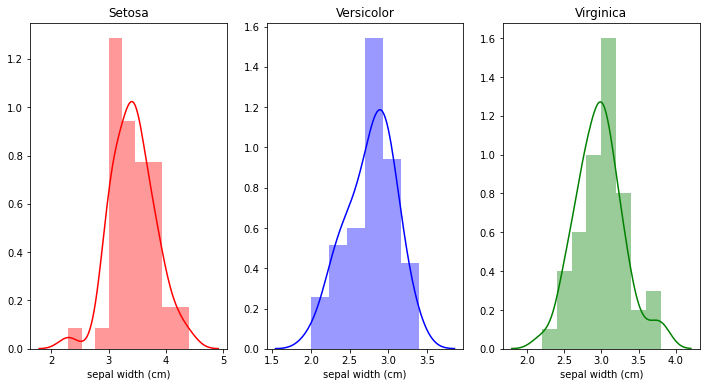

In [14]:
fig, axes = plt.subplots(1, 3)
count = 0
titles = ("Setosa", "Versicolor", "Virginica")
colors = ("r", "b", "g")

for i in [df_setosa, df_versicolor, df_virginica]:
    sns.distplot(i['sepal width (cm)'], ax=axes[count], color=colors[count])
    axes[count].title.set_text(titles[count])
    count+=1

#### Assumption 6

Assumption 6 asserts that there must be homogeneity of variances between the category samples. This can be tested for using Levene's test for homogeneity of variances. If the Levenes test p-value is less than our significance level ($ \alpha .05$) than we can reject the Levene's null hypothesis that the variance is the same across the categories. If the p-value is greater than 0.05 we can accept the null hypothesis that the variances are the same and the data meets the assumption criteria for an ANOVA analysis.

To conduct the levenes test we use the levene function from scipy.stats. Here we add the 3 categories as our data, and we chose the mean as the central value as per the original test described by Levene's original paper. The Brown–Forsythe method, where the median is used instead of mean, is commonly used and considered more robust, especially when the data is not normally distributed. (nist.gov, 2021)

We complete the test below and get the result test statistic of 0.691 with a pvalue of 0.5025. This p value is larger than our significance level of .05 so we can accept the null hypothesis that Variance across the categories is the same.


In [15]:
stats.levene(df_setosa['sepal width (cm)'],df_virginica['sepal width (cm)'], df_virginica['sepal width (cm)'], center='mean')

LeveneResult(statistic=0.6913349204281084, pvalue=0.5025280368391021)

***
## Preforming the ANOVA

Now that we made sure that our data meets the assumptions for an ANOVA, we can perform our analysis. The ANOVA is performed with just a single line of code as seen in our example earlier. Using the scipy.stats method **f_oneway**, and the 3 category datasets as parameters the function returns an f statistic and p-value for our data, shown below.

In [16]:
stats.f_oneway(df_setosa['sepal width (cm)'],df_virginica['sepal width (cm)'], df_virginica['sepal width (cm)'])

F_onewayResult(statistic=29.302984936053672, pvalue=1.9484921026455896e-11)

## Interpreting results

Now that we have our ANOVA results we can decide whether we can reject our Null hypothesis, the Null hypotheses being: *the means for the 3 species are the same.*

Our F Statistic is shown as 29.3 and our P value is extremely small at 1.9484921026455896e-11. Looking at our F Distribution table below, we can see that for a degree of freedom for numerator of 2, and degree of freedom for denominator 147 (inf), we would need an F-statistic greater than 2.9957 in order to reject the Null hypothesis.

As our F-statistic is fare greater than the critical value of 2.9957 we can reject the Null hypotheses and accept the alternative hypothesis: 
*the means of the groups are not the same.*


F Distribution Table
![](https://www.statology.org/wp-content/uploads/2018/09/f.05.png)

***
# Summary

The SciPy module is an extremely important package for statistical analysis within the Python programming language. It builds on other foundational numerical packages such as Numpy to provide a vast array of methods and tools for advanced statistical analysis making it very popular in research, academic and scientific computing as well as within private industry.

The open source nature of python and SciPy make it a much cheaper and more widely available alternative than proprietary systems such as SPSS.

This project's focus was on the statistical sub-package scipy.stats. However, there are many other sub-packages within the SciPy ecosystem that provide key fucntionality for other scientific computing domains.

The scipy.stats statistical package is a large module that contains probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

Scipy.stats provides convenient functions and methods for performing certain standard statistical tests such as the ANOVA analysis. ANOVA is a statistical technique for examining the variance of means of 2 or more categories of independent variables. Scipy stats allows us to perform this analysis in a single python statement, below:

`f_oneway(group_1, group_2, group_3)` 

This function returns the calculated F statistic and P-value needed to complete an ANOVA analysis.

Because scipy.stats provides this convenient fucntionality, it is even more important to understand the underlying statistical merit of the analysis being conducted. Being able to determine if the ANOVA is a suitable method for the dataset in question, eg does it fulfil the necessary assumptions, and being able to correctly interpret the results are perhaps the most important piece f the puzzle. The easy at which these types of analysis can be conducted with a tool like scipy is likely to lead to  plenty of mis-use if the user preforming the analysis does not have the prerequisite knowledge.

# References
***
1. scipy.org, 2021. SciPy: Introduction https://docs.scipy.org/doc/scipy/tutorial/general.html

2. Bressert, Eli, 2013. SciPy and Numpy, ISBN:978-1-449-30546-8 

3. Malhorta, K Naresh & Birks, David F, 2006. Marketing Research: An applied Approach. ISBN: 0-273-69530-4

4. scipy.org, 2021. Scipy.stats.f_oneway https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

5. Laerd Statistics, 2021.One-way ANOVA in SPSS Statistics https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

6. Ilola, Eveliina Ilola, 2018. A beginner’s guide to standard deviation and standard error. https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/

7. Seaborn.pydata.org, 2021. Seaborn Distplot. https://seaborn.pydata.org/generated/seaborn.distplot.html

8. Nist.gov, 2013. Levene Test for Equality of Variances https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm